# Análisis de Fourier

<div>
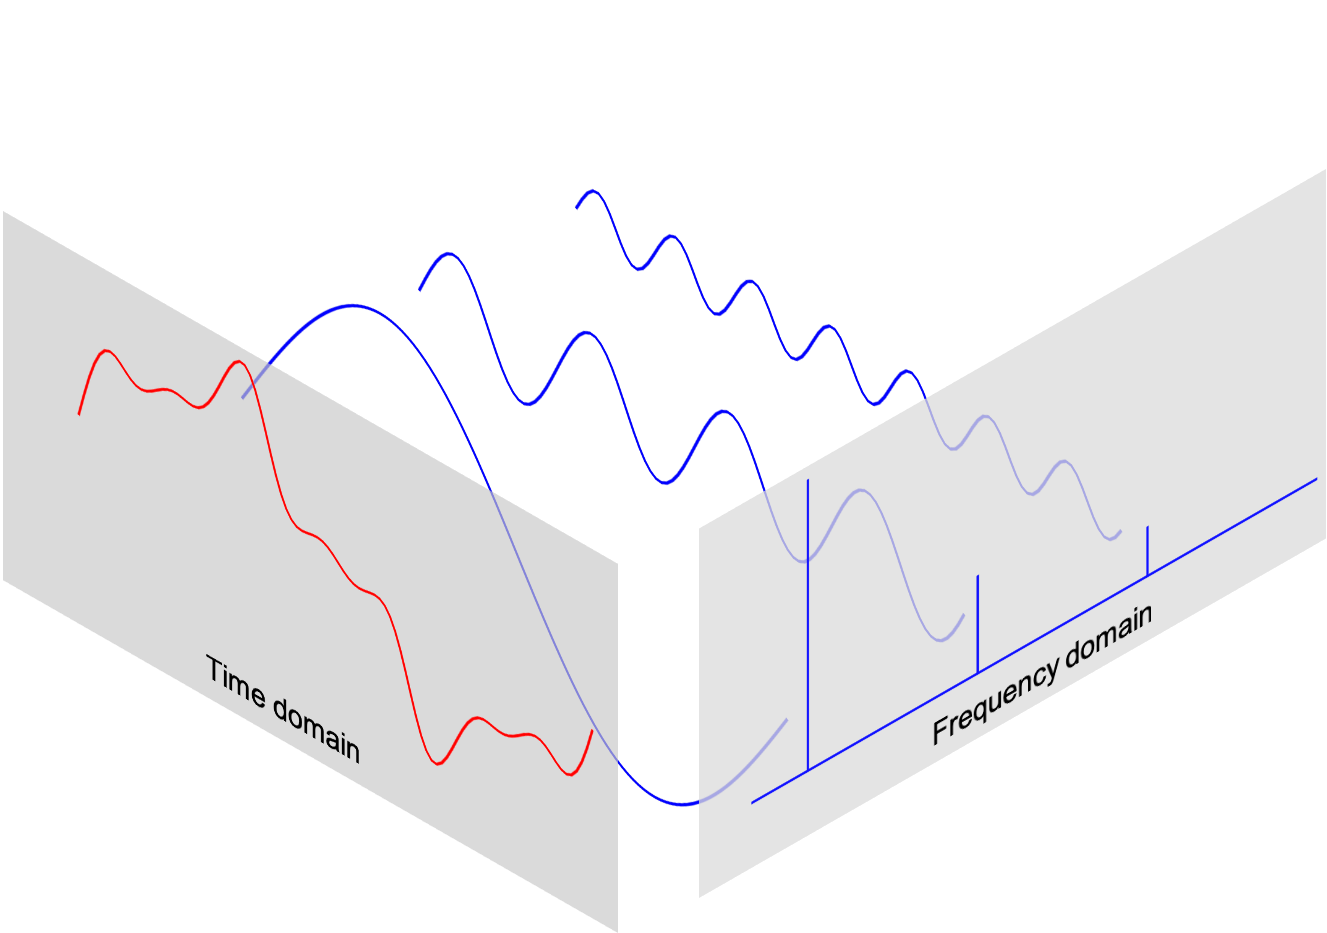
</div>
<!-- 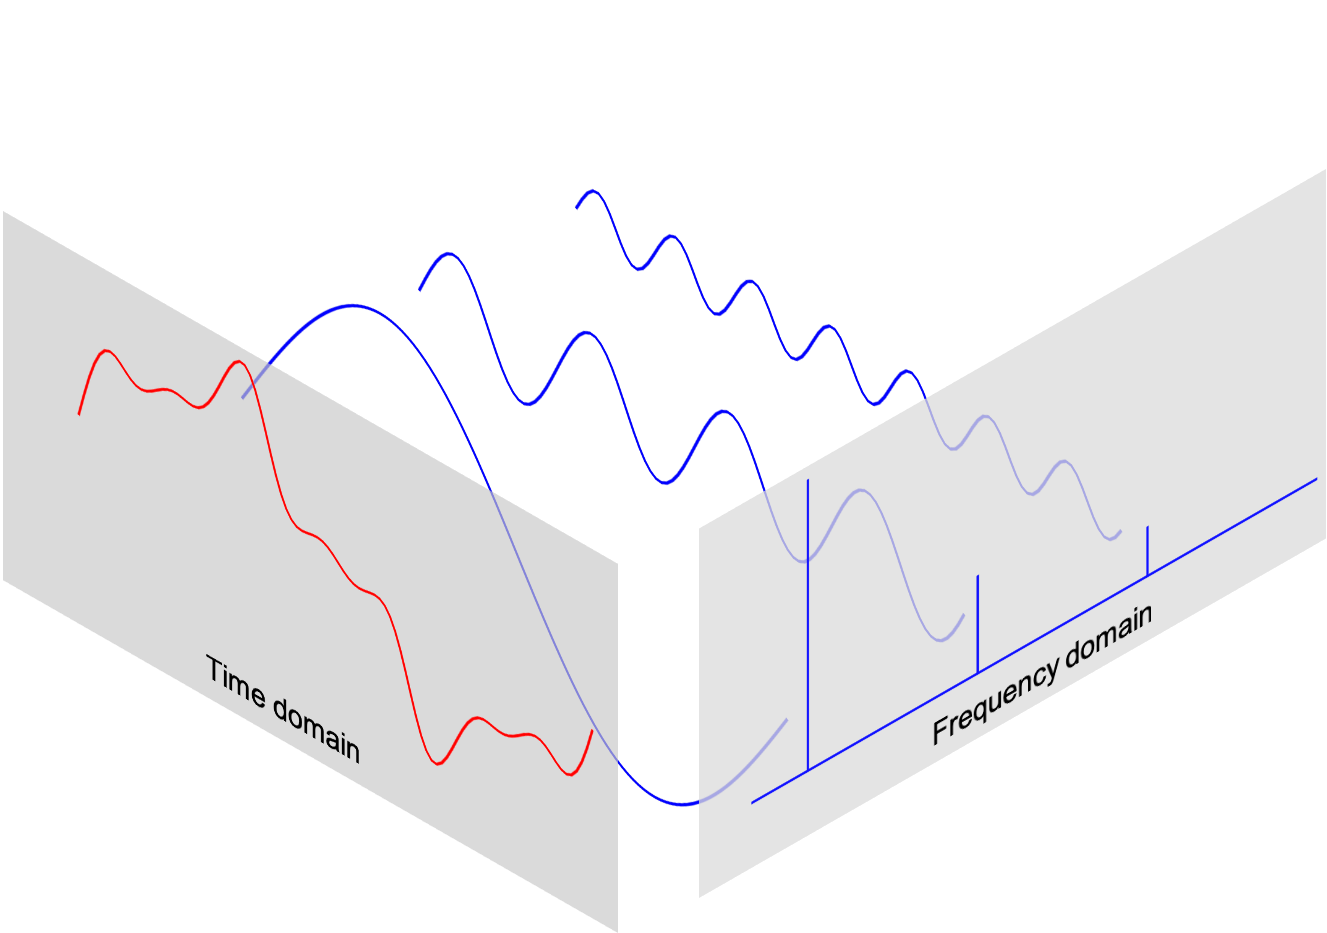 -->

Las transformadas de Fourier son una herramienta estándar ampliamente usada en ciencia e ingenería. Se utiliza en problemas que involucran vibraciones u oscilaciones.

Aplicaciones:
- Análisis y procesamiento de señales: Filtrado, codificación, ...
- Solución de EDP: ecuación de difusión, ecuación de Shrödinger
- Cálculo de convoluciones
- Compresión de datos

## Series de Fourier (Boas $\S$ 7.5, Landau $\S$ 10.2)

Para una función que cumple que $f(t+T) = f(t)$, es decir, una función periódica, se puede definir una frecuencia principal $\omega = \omega_1 = \dfrac{2\pi}{T}$

Esta función se puede expresar como una expansión de la forma:
\begin{equation}
f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos{(n\omega t)} + \sum_{n=1}^{\infty}b_n\sin{(n\omega t)}
\end{equation}

donde la intensidad de cada frecuencia se calcula como $a_n^2 + b_n^2$

Cada coeficiente se puede calcular de la siguiente manera:

\begin{align}
a_n &= \dfrac{2}{T}\int_0^T\cos{(n\omega t)}f(t)\mathrm{d}t\\
b_n &= \dfrac{2}{T}\int_0^T\sin{(n\omega t)}f(t)\mathrm{d}t
\end{align}

donde $a_0 = 2\langle f(t)\rangle$

El cómputo de los coeficientes se puede simplificar para funciones pares o impares:

Una función par cumple que $f(-t) = f(t)$

$\Rightarrow b_n\equiv 0$

Una función impar cumple que $f(-t) = -f(t)$

$\Rightarrow a_n\equiv 0$

El teorema de Dirichlet asegura la convergencia de la serie de Fourier a los valores de f(t) para funciones que cumplan las _condiciones de Dirichlet_

## Forma compleja de las series de Fourier (Boas $\S$ 7.7)

Las funciones seno y coseno se pueden expresar en términos de exponenciales complejos a través de la fórmula de Euler:

\begin{align}
\cos(\theta) &= \dfrac{e^{i\theta}+e^{-i\theta}}{2}\\
\sin(\theta) &= \dfrac{e^{i\theta}-e^{-i\theta}}{2i}\\
\end{align}

Por lo tanto, es posible obtener una formulación compleja de las series de Fourier:

\begin{align}
f(t) &= c_0 + c_1e^{i\omega t} + c_{-1}e^{-i\omega t} + c_{2}e^{2i\omega t} + c_{-2}e^{-2i\omega t} + \dots\\
&= \sum_{n=-\infty}^{n=\infty}c_ne^{i n \omega t}
\end{align}

In [1]:
from scipy import integrate

integrate?

## Ejemplo

In [4]:
# Bibliotecas básicas
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# funciones para el cálculo de la serie de Fourier
import analisis_de_Fourier as AF

# funciones para la visualización interactiva
from ipywidgets import interactive, interact, FloatSlider
import ipywidgets as widgets
from IPython.display import display

In [5]:
def GráficoAnálisisFourier(nTerminos, i):
    """
    nTerminos: número de términos a sumar en la serie de Fourier
    Toma una señal de entrada y la aproxima mediante una serie de Fourier
    """
    # Parámetros
    periodoL = 8 # periodo de la función f(x)
    freq = 4 # frecuencia angular o número de ondas en un periodo
    dutycycle = 0.5
    width_range = 1
    nMuestras = 1000
    nTerminos = int(nTerminos)

    # Puntos t
    arreglo_X = np.linspace(0, periodoL, nMuestras, endpoint=False)
#     arreglo_X = np.linspace(-periodoL, periodoL, nMuestras, endpoint=False)
    
    # Señales y(t)

    señales = np.zeros((7,nMuestras))

    señales[0] = np.sin(2*np.pi*1*arreglo_X)
    señales[1] = np.cos(2*np.pi*1*arreglo_X)
    señales[2] = signal.sawtooth(2.0*np.pi*arreglo_X*freq/periodoL ,width=width_range)
    señales[3] = signal.square(2*np.pi*arreglo_X*freq/periodoL , duty=dutycycle)
    señales[4] = signal.gausspulse(2.0*np.pi*arreglo_X*freq/periodoL, fc=0.05)
    señales[5] = signal.ricker(nMuestras, 100) # Sombrero mexicano
    señales[6] = signal.unit_impulse(nMuestras, 'mid')
    
    # Señal de entrada
    arreglo_Y = señales[i]
    
    señal_aprox, coeficientes = AF.Analisis_Fourier(arreglo_X, arreglo_Y, nTerminos, nMuestras, periodoL)

    # Gráfico
    fig, ax = plt.subplots(dpi=120)
    
    ax.plot(arreglo_X, señal_aprox, label='Aprox Fourier')
    ax.plot(arreglo_X, arreglo_Y, label='Señal orig', alpha=0.5)
  
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y=f(t)$')
    
    ax.set_xlim([2,6])
#     ax.set_xlim([-2,2])
#     ax.set_ylim([0,1])
    
    ax.legend(loc='best', prop={'size':10})
    ax.set_title('Análisis de Fourier para una señal')
    
    plt.show()
    
    # Mostrar solo los coeficientes que aportan a la suma
    umbral = 0.001
    for iCont in range(1, nTerminos+1):
        if abs(coeficientes[0,iCont-1])>umbral or abs(coeficientes[1,iCont-1])>umbral:
            print('Coeficientes para el {}-ésimo término: {:.4f}, {:.4f}'.format(iCont, coeficientes[0,iCont-1], coeficientes[1,iCont-1]))
    
    return

In [7]:
# arreglo_Y
nT = FloatSlider(min=1, max=100, step=1., continuous_update=False)
interact(GráficoAnálisisFourier, nTerminos = nT, i=[('seno', 0), ('coseno', 1), ('sierra', 2), ('pulso cuadrado', 3), ('Ricker', 4), ('Ricker', 5), ('paso', 6)]);

# Deslizador interactivo para darle parámetros de entrada a la función GráficoAnálisisFourier()
# deslizador = interactive(GráficoAnálisisFourier, nTerminos=widgets.IntSlider(min=1, max=100, step=1, value=1, description='nTerminos:'))

# display(deslizador)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='nTerminos', min=1.0, step=1…

## Transformada de Fourier (Boas $\S$ 7.12, Landau $\S$ 10.4)

Las series de Fourier representan una función periódica como un conjunto discreto de frecuencias, esta idea se puede extender a una función que no sea periódica y que se represente como un conjunto continuo (o espectro) de frecuencias.

Mientras las series de Fourier son convenientes para representar funciones periódicas, las transformadas son más adecuadas para representar funciones no-periódicas como un pico de voltaje, un pulso de luz o un sonido que no se repite.

Recuerde la forma compleja de la suma de Fourier:
\begin{equation}
f(t) = \sum_{n=-\infty}^{n=\infty}c_ne^{i n \omega t}
\end{equation}

Se expresa una función o $\textit{señal}$, $y(t)$, como:
\begin{equation}
y(t) = \int_{-\infty}^{+\infty}Y(\omega)~\mathrm{e}^{i\omega t}~\mathrm{d}\omega
\end{equation}

la transformada se expresa como:
\begin{equation}
Y(\omega) = \dfrac{1}{2\pi}\int_{-\infty}^{+\infty}y(t)~\mathrm{e}^{-i\omega t}~\mathrm{d}t
\end{equation}

donde $Y(\omega)$ es conocida como la función espectral.

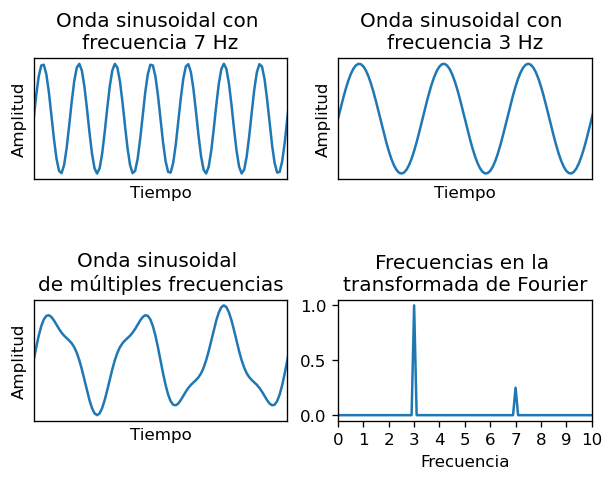

In [47]:
# Tomado de https://pythontic.com/visualization/signals/fouriertransform_fft

import numpy as np
import matplotlib.pyplot as plt
import scipy.fft

# How many time points are needed i,e., Sampling Frequency
samplingFrequency = 100;

# At what intervals time points are sampled
samplingInterval = 1/samplingFrequency;

# Begin time period of the signals
beginTime = 0;

# End time period of the signals
endTime = 10; 

# Frequency of the signals
signal1Frequency = 7;
signal2Frequency = 3;

# Time points
time = np.arange(beginTime, endTime, samplingInterval);
# print(len(time))

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot
figure, axis = plt.subplots(2, 2, dpi=120)
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0,0].set_title('Onda sinusoidal con \nfrecuencia {} Hz'.format(signal1Frequency))
axis[0,0].plot(time, amplitude1)
axis[0,0].set_xlabel('Tiempo')
axis[0,0].set_ylabel('Amplitud')
axis[0,0].set_xticks([])
axis[0,0].set_xlim(0,1)
axis[0,0].set_yticks([])

# Time domain representation for sine wave 2
axis[0,1].set_title('Onda sinusoidal con \nfrecuencia {} Hz'.format(signal2Frequency))
axis[0,1].plot(time, amplitude2)
axis[0,1].set_xlabel('Tiempo')
axis[0,1].set_ylabel('Amplitud')
axis[0,1].set_xticks([])
axis[0,1].set_xlim(0,1)
axis[0,1].set_yticks([])

# Add the sine waves
amplitude = 0.5*amplitude1 + 2*amplitude2# + 2*np.random.random(len(time))

# Time domain representation of the resultant sine wave
axis[1,0].set_title('Onda sinusoidal \nde múltiples frecuencias')
axis[1,0].plot(time, amplitude)
axis[1,0].set_xlabel('Tiempo')
axis[1,0].set_ylabel('Amplitud')
axis[1,0].set_xticks([])
axis[1,0].set_xlim(0,1)
axis[1,0].set_yticks([])

# Frequency domain representation
# Implementación con np.fft.fft
# fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

#Implementación con scipy.fft.fft
fourierTransform = scipy.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount = len(amplitude)

values = np.arange(int(tpCount/2))
timePeriod = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[1,1].set_title('Frecuencias en la \ntransformada de Fourier')
axis[1,1].plot(frequencies, abs(fourierTransform))
axis[1,1].set_xlabel('Frecuencia')
# axis[1,1].set_ylabel('Amplitud')
axis[1,1].set_xlim(0,10)
axis[1,1].set_xticks(np.arange(11))
# axis[1,1].set_yticks([])

plt.show()

In [23]:
señales = np.zeros(6)
señales

array([0., 0., 0., 0., 0., 0.])